## データの取り込みと確認

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib
import seaborn as sns
import pandas as pd
import numpy as np
sns.set(font = "IPAexGothic", style = "white") #グラフのプロパティを設定
plt.rcParams["figure.figsize"] = [10, 5] #グラフの大きさを設定
pd.set_option('display.max_columns', 150) #表示する列数の上限を150に設定
pd.set_option('display.max_rows', 50) #表示する行数の上限を50に設定

In [2]:
# データの取り込み
df_master = pd.read_csv("exam_analysis_data.csv")
df = df_master.copy()
df.head()

,ID,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,math score
0,247,male,group D,some high school,standard,NaN,71,61.0,68
1,502,male,group D,associate's degree,standard,NaN,57,59.0,71
2,25,male,group C,high school,free/reduced,NaN,45,42.0,51
3,244,male,group B,some high school,standard,NaN,34,28.0,36
4,652,female,group C,some high school,standard,completed,100,97.0,92


infoメソッドやdescribeメソッドを使って、おかしなデータがないか確認する。

In [3]:
#データの欠損と型の確認(info)
df.info()

#test preparation courseとwriting scoreに欠損あり。
#writing scoreの欠損はわずかなので無視して分析すれば問題ない
#test preparation courseは後ほど気をつける必要がある

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           900 non-null    int64  
 1   gender                       900 non-null    object 
 2   race/ethnicity               900 non-null    object 
 3   parental level of education  900 non-null    object 
 4   lunch                        900 non-null    object 
 5   test preparation course      297 non-null    object 
 6   reading score                900 non-null    int64  
 7   writing score                892 non-null    float64
 8   math score                   900 non-null    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 63.4+ KB


In [4]:
#データ要約確認(describe)
display(df.describe()) #数値データ
display(df.describe(include="object")) #文字列データ

#どの教科も近しい平均点と標準偏差

,ID,reading score,writing score,math score
count,900.000000,900.000000,892.000000,900.000000
mean,499.837778,68.824444,67.591928,66.346667
std,287.676798,14.764758,15.611568,15.221897
min,0.000000,0.000000,0.000000,13.000000
25%,249.750000,59.750000,58.000000,56.000000
50%,501.500000,70.000000,68.000000,67.000000
75%,746.250000,79.000000,79.000000,77.000000
max,999.000000,100.000000,100.000000,100.000000


,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,900,900,900,900,297
unique,2,5,6,2,1
top,male,group C,some college,standard,completed
freq,463,292,192,592,297


## 課題1. 3教科の点数はどのような分布で、教科間の相関はどれくらいか？

各教科の点数のヒストグラムを作成する  
各教科間の散布図を作成し、相関係数を算出する  

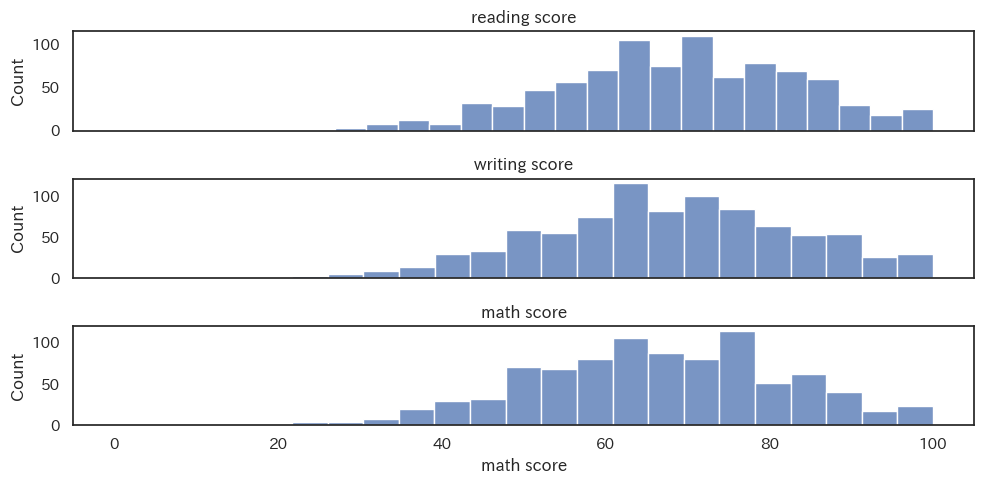

In [5]:
#各教科の点数のヒストグラムを作成する  
fig, axes = plt.subplots(3, 1, tight_layout=True, sharex="all") #sharexでx軸の単位を統一
sns.histplot(df["reading score"], ax=axes[0])
axes[0].set_title("reading score")
sns.histplot(df["writing score"], ax=axes[1])
axes[1].set_title("writing score")
sns.histplot(df["math score"], ax=axes[2])
axes[2].set_title("math score")
plt.show()

#どの教科もおおむね正規分布している

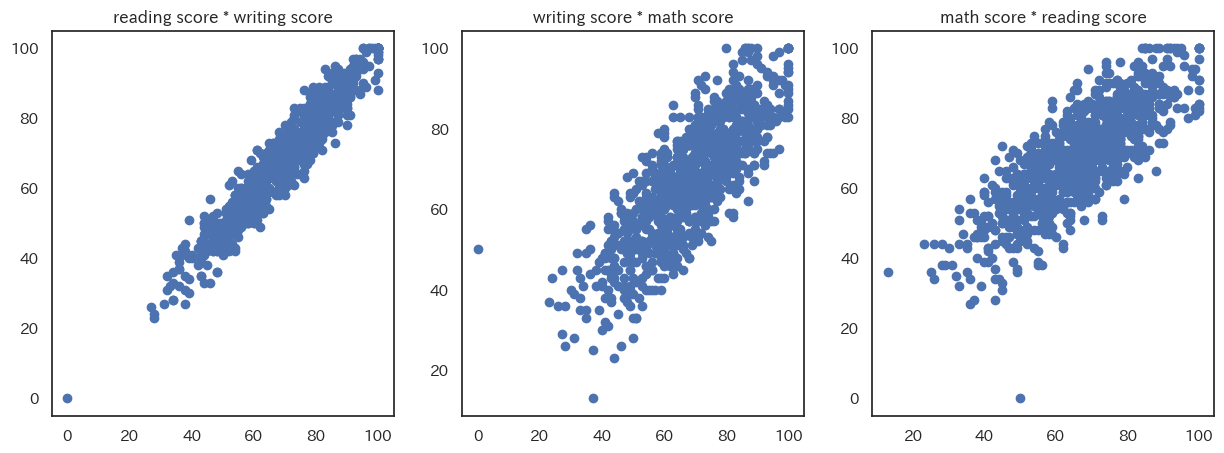

,reading score,writing score,math score
reading score,1.000000,0.954931,0.806985
writing score,0.954931,1.000000,0.799028
math score,0.806985,0.799028,1.000000


In [6]:
#各教科間の散布図を作成し、相関係数を算出する
fig, axes = plt.subplots(1, 3, figsize=(15,5)) #sharexでx軸の単位を統一
axes[0].scatter(df["reading score"], df["writing score"])
axes[0].set_title("reading score * writing score")
axes[1].scatter(df["writing score"], df["math score"])
axes[1].set_title("writing score * math score")
axes[2].scatter(df["math score"], df["reading score"])
axes[2].set_title("math score * reading score")
plt.show()
df[["reading score", "writing score", "math score"]].corr(method = "pearson") #正規分布していない場合はmethod="spearman"の方が良い

#readingとwritingは相関係数0.95とかなり強い相関がある
#mathも他の教科と0.8程度の相関があり、強い相関があると言える

### 【結論】
どの教科も平均67、標準偏差15の正規分布  
どの教科も強い相関があり、特にreading scoreとwriting scoreの相関が強い

## 課題2. 各要因と各教科の点数に関連性はあるか？

gender, race, parental level of education, lunch, test preparation courseと各教科の関連性を確認する  
→上記変数の値毎に各教科点数の箱ひげ図orバイオリンプロットを作成する + 統計値(平均など)の差を確認する  

gender
male      463
female    437
Name: count, dtype: int64
        reading score  writing score  math score
gender                                          
female      71.496568      71.280093   62.926773
male        66.302376      64.128261   69.574514


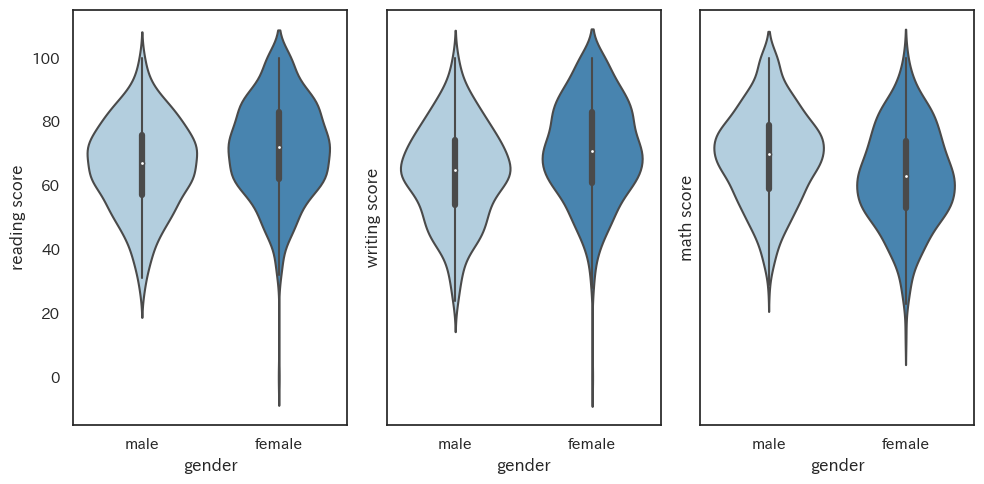

In [7]:
#gender
target = "gender"
fig, axes = plt.subplots(1, 3, tight_layout=True, sharey="all")
sns.violinplot(x=target, y="reading score", data=df, palette="Blues", ax=axes[0])
sns.violinplot(x=target, y="writing score", data=df, palette="Blues", ax=axes[1])
sns.violinplot(x=target, y="math score", data=df, palette="Blues", ax=axes[2])
print(df[target].value_counts())
print(df.groupby(target).mean(numeric_only=True)[["reading score", "writing score", "math score"]])

#男子は数学の点数が高めなのに対して、女子は読み書きの点数が高い傾向

race/ethnicity
group C    292
group D    235
group B    184
group E    115
group A     74
Name: count, dtype: int64
                reading score  writing score  math score
race/ethnicity                                          
group A             68.635135      67.000000   65.108108
group B             66.994565      65.456522   63.163043
group C             66.544521      64.761246   63.431507
group D             71.434043      71.718615   69.106383
group E             72.330435      70.236842   74.000000


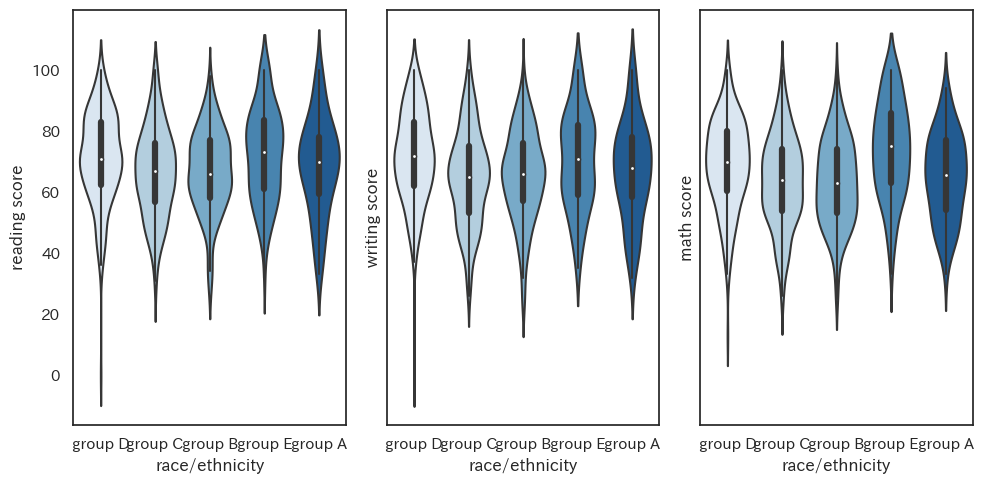

In [8]:
#race/ethnicity	
target = "race/ethnicity"
fig, axes = plt.subplots(1, 3, tight_layout=True, sharey="all")
sns.violinplot(x=target, y="reading score", data=df, palette="Blues", ax=axes[0])
sns.violinplot(x=target, y="writing score", data=df, palette="Blues", ax=axes[1])
sns.violinplot(x=target, y="math score", data=df, palette="Blues", ax=axes[2])
print(df[target].value_counts())
print(df.groupby(target).mean(numeric_only=True)[["reading score", "writing score", "math score"]])

#groupDとEが全教科で点数が高い傾向があり、groupEは数学の点数の良さが顕著

parental level of education
some college          192
associate's degree    187
high school           183
some high school      175
bachelor's degree     101
master's degree        62
Name: count, dtype: int64
                             reading score  writing score  math score
parental level of education                                          
associate's degree               70.518717      69.741935   69.614973
bachelor's degree                74.019802      74.267327   71.534653
high school                      67.218579      64.573770   65.114754
master's degree                  75.806452      76.419355   72.016129
some college                     68.182292      66.718750   65.348958
some high school                 63.925714      62.226190   60.234286


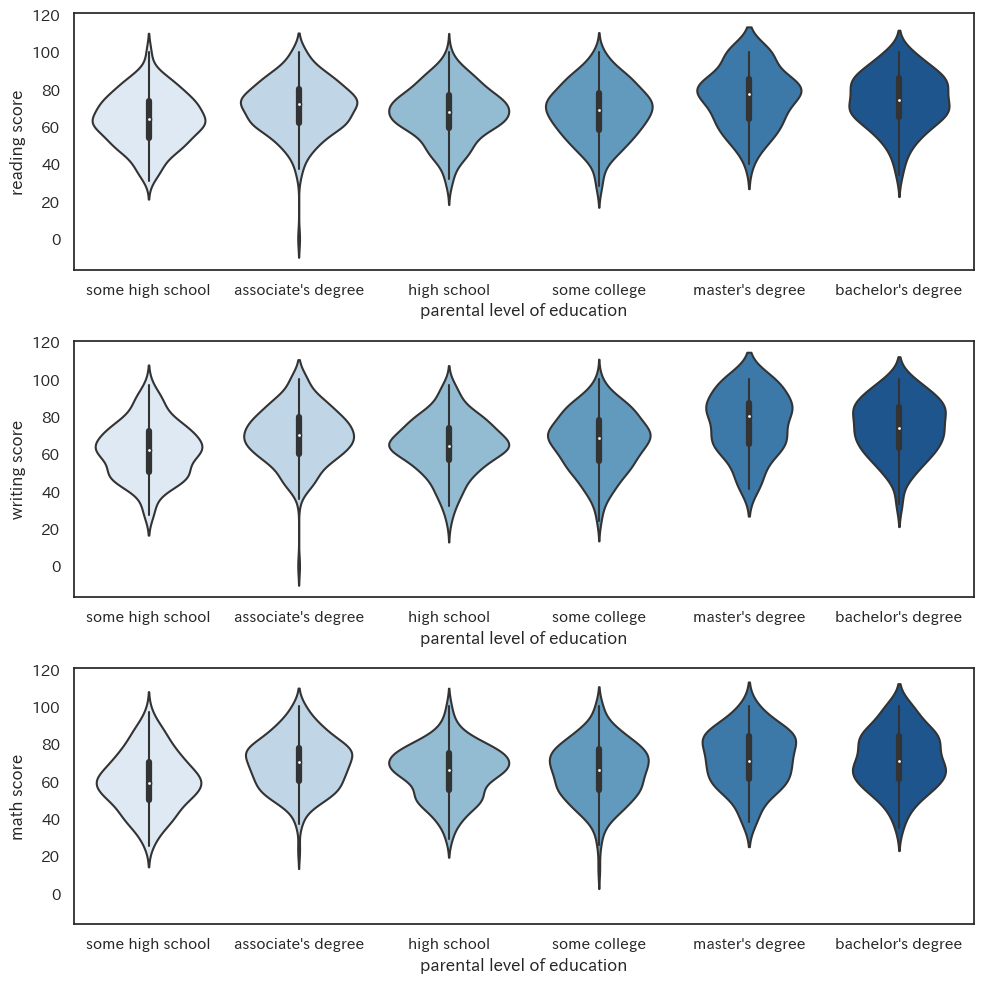

In [9]:
#parental level of education
target = "parental level of education"
fig, axes = plt.subplots(3, 1, tight_layout=True, sharey="all", figsize=(10,10))
sns.violinplot(x=target, y="reading score", data=df, palette="Blues", ax=axes[0])
sns.violinplot(x=target, y="writing score", data=df, palette="Blues", ax=axes[1])
sns.violinplot(x=target, y="math score", data=df, palette="Blues", ax=axes[2])
print(df[target].value_counts())
print(df.groupby(target).mean(numeric_only=True)[["reading score", "writing score", "math score"]])

#どの教科もmaster's degree > bachelor's degree(学士) > associate's degree(準学士、短大卒)の順に点数が高い
#基本的に親が高学歴であればあるほど点数が高くなる傾向

lunch
standard        592
free/reduced    308
Name: count, dtype: int64
              reading score  writing score  math score
lunch                                                 
free/reduced      63.146104      60.911184   58.451299
standard          71.778716      71.045918   70.454392


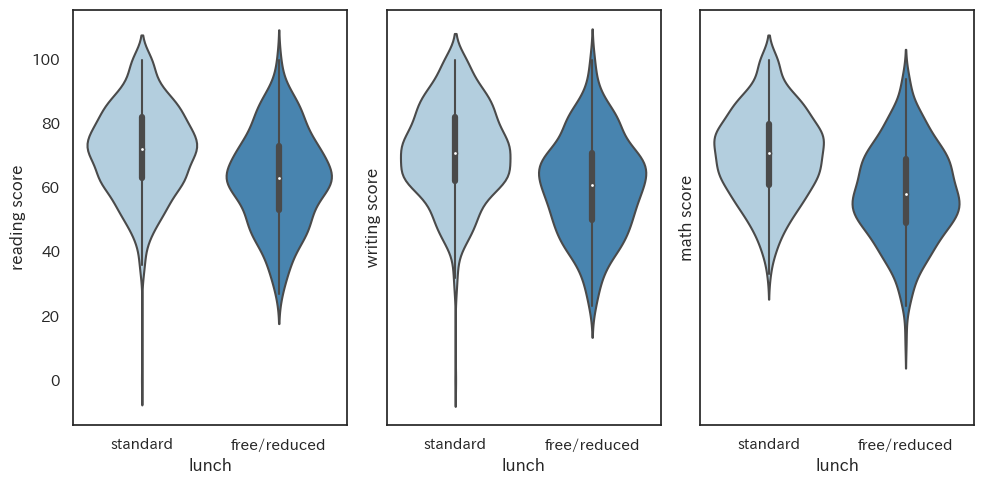

In [10]:
#lunch
target = "lunch"
fig, axes = plt.subplots(1, 3, tight_layout=True, sharey="all")
sns.violinplot(x=target, y="reading score", data=df, palette="Blues", ax=axes[0])
sns.violinplot(x=target, y="writing score", data=df, palette="Blues", ax=axes[1])
sns.violinplot(x=target, y="math score", data=df, palette="Blues", ax=axes[2])
print(df[target].value_counts())
print(df.groupby(target).mean(numeric_only=True)[["reading score", "writing score", "math score"]])

#どの教科もstandardの方が点数が高い傾向

In [11]:
#test preparation course　※欠損の調査
df["test preparation course"].value_counts()

#値がcompletedか欠損しかない
#欠損は完了していない生徒と考えるのが良さそうなため、欠損に"un_completed"を代入して分析する

test preparation course
completed    297
Name: count, dtype: int64

test preparation course
un_completed    603
completed       297
Name: count, dtype: int64
                         reading score  writing score  math score
test preparation course                                          
completed                    74.158249      74.823729   70.138047
un_completed                 66.197347      64.018425   64.479270


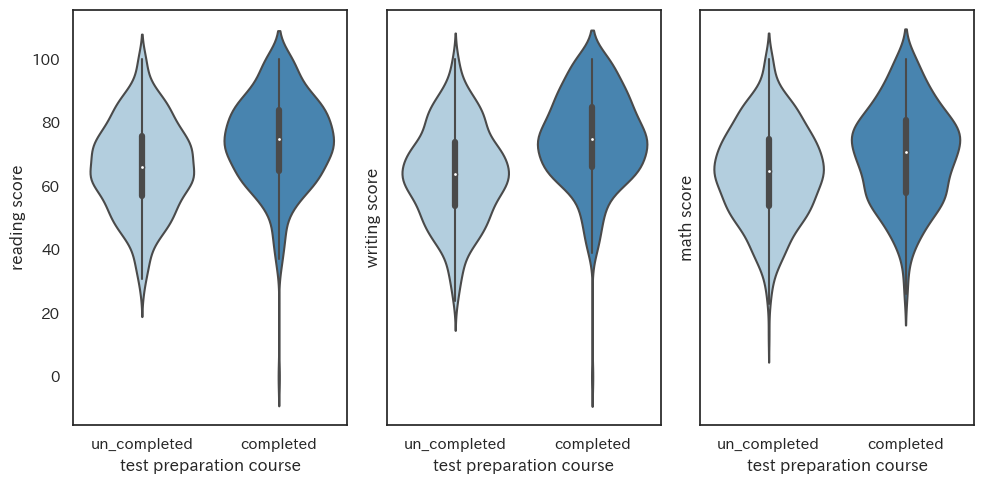

In [12]:
#test preparation course
df["test preparation course"] = df["test preparation course"].fillna("un_completed")
target = "test preparation course"
fig, axes = plt.subplots(1, 3, tight_layout=True, sharey="all")
sns.violinplot(x=target, y="reading score", data=df, palette="Blues", ax=axes[0])
sns.violinplot(x=target, y="writing score", data=df, palette="Blues", ax=axes[1])
sns.violinplot(x=target, y="math score", data=df, palette="Blues", ax=axes[2])
print(df[target].value_counts())
print(df.groupby(target).mean(numeric_only=True)[["reading score", "writing score", "math score"]])

#どの教科もtest preparation courseを完了した生徒の方が点数が高い傾向

### 【結論】
全教科の点数が高いのは以下の要因を持つ生徒
- raceがgroupDかE
- 親が高学歴
- lunchがstandard
- test preparation courseを完了している

数学の点数が高いの以下の要因を持つ生徒
- 男子(女子は読み書きが強い)
- raceがgroupE

## 課題3. 各教科の点数を改善するために、できることは何か？

1. test preparation courseを完了する  
   ただし成績に関係なくtest preparation courseを受けていたことが条件(成績のいい子のみ受けていた場合、ただの疑似相関と言える)  
2. raceや親の学歴によって成績がいい理由を調査する  
   教育法が違うなど、真似できる部分があるかもしれない  

## 分析の結論

### 課題1. 3教科の点数はどのような分布で、教科間の相関はどれくらいか？
どの教科も平均67、標準偏差15の正規分布  
どの教科も強い相関があり、特にreading scoreとwriting scoreの相関が強い

### 課題2. 各要因と各教科の点数に関連性はあるか？

全教科の点数が高いのは以下の要因を持つ生徒
- raceがgroupDかE
- 親が高学歴
- lunchがstandard
- test preparation courseを完了している

数学の点数が高いの以下の要因を持つ生徒
- 男子(女子は読み書きが強い)
- raceがgroupE

### 課題3. 各教科の点数を改善するために、できることは何か？

1. test preparation courseを完了する  
   ただし成績に関係なくtest preparation courseを受けていたことが条件(成績のいい子のみ受けていた場合、ただの疑似相関と言える)  
2. raceや親の学歴によって成績がいい理由を調査する  
   教育法が違うなど、真似できる部分があるかもしれない  